In [1]:
# Feb 2023 - freezed
# Auto-Decoder -->  convolusion added
# just added a conv on datasets. 
# I don't apply fuzzy outputs of conv on outputs(labels) and instead for labels
# I only used 0 and 1. 

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
from math import sqrt, floor

def circle(radius=2, box_size=28):
    '''
    to put some solid boxes in plain white images
    returns image(s) with boxes on them with the radius defined for them
    Comment: radius is a misnormer here. I wanted to show a scale thing for box in image
    firstly I wrote a cricle function (not a box) that is why I left radius like this 
    '''
    box_siz = (box_size//2) * 2
    if isinstance(radius, int):
        radius = np.array([radius])
    
    elif isinstance(radius, float):
        radius = np.array([floor(radius)])
        
    elif not isinstance(radius, np.ndarray):
        rads = np.array(radius)
        
    rads = np.array(radius)

    position = np.zeros((rads.size, box_size//2 * 2, box_size//2 * 2))
#     print(rads)

    for i, r in enumerate(rads-1):

        for  x in range(-box_size//2, box_size//2):
            for y in range(-box_size//2, box_size//2):
                if (x**2+y**2 - r**2 <0.1):
                    position[i, x+box_size//2 , y+box_size//2] =  1    
                

                
    return   torch.from_numpy(position)
#     return  torch.from_numpy(position).flatten(start_dim=1)

In [4]:
from math import sqrt, floor

def line(radius=2, box_size=28, line_ori = 'x'):
    '''
    to put some solid boxes in plain white images
    returns image(s) with boxes on them with the radius defined for them
    Comment: radius is a misnormer here. I wanted to show a scale thing for box in image
    firstly I wrote a cricle function (not a box) that is why I left radius like this 
    '''
    box_siz = (box_size//2) * 2
    if isinstance(radius, int):
        radius = np.array([radius])
    
    elif isinstance(radius, float):
        radius = np.array([floor(radius)])
        
    elif not isinstance(radius, np.ndarray):
        rads = np.array(radius)
        
    rads = np.array(radius)

    position = np.zeros((rads.size, box_size//2 * 2, box_size//2 * 2))
#     print(rads)

    for i, r in enumerate(rads-1):

        for  x in range(box_siz):
            for y in range(box_siz):
                
                if (x>=y-r and (x<=y+r) and line_ori=='diag'):
                    position[i, x , y] = 1
                if (box_size-x>=y-r and (box_size-x<=y+r) and line_ori=='anti_diag'):
                    position[i, x , y] = 1  
                    
                elif (x>=r and (x<=r+1) and line_ori=='x') :
                    position[i, x , y] = 1
                
                elif (y>=r and (y<=r+1) and line_ori=='y') :
                    position[i, x , y] = 1    
                

                
    return   torch.from_numpy(position)
#     return  torch.from_numpy(position).flatten(start_dim=1)

In [5]:
line(radius=7, box_size=15, line_ori='anti_diag')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]]],
       dtype=torch.float64)

In [6]:
from math import sqrt, floor

def box(radius=2, box_size=28):
    '''
    to put some solid boxes in plain white images
    returns image(s) with boxes on them with the radius defined for them
    Comment: radius is a misnormer here. I wanted to show a scale thing for box in image
    firstly I wrote a cricle function (not a box) that is why I left radius like this 
    '''
    box_siz = (box_size//2) * 2
    if isinstance(radius, int):
        radius = np.array([radius])
    
    elif isinstance(radius, float):
        radius = np.array([floor(radius)])
        
    elif not isinstance(radius, np.ndarray):
        rads = np.array(radius)
        
    rads = np.array(radius)

    position = np.zeros((rads.size, box_size//2 * 2, box_size//2 * 2))
#     print(rads)

    for i, r in enumerate(rads-1):
#         for  x in range(0, box_siz):
#             for  y in range(0, box_siz):
#                 if (x<=r or x+r>=box_siz-1): #and   (y>=r and y+r<box_siz) :
#                     position[i, x , y] = 1
#                 elif (y<=r or y+r>=box_siz-1): # and (x>=r and x+r<box_siz) :
#                     position[i, x , y] = 1
                    
                    
#                 elif (y==r or y+r==(box_size//2)*2-1) and (x>=r and x+r<(box_size//2)*2) :
#                     position[i, x , y] = 1 

        for  x in range(-box_size//2, box_size//2):
            for y in range(-box_size//2, box_size//2):
#                 if (x**2+y**2 - r**2 <0.1):
#                     position[i, x+box_size//2 , y+box_size//2] =  1    
                
                if ((abs(x) - r) < 0.01 and (abs(y) - r) < 0.01 ):
                    position[i, x+box_size//2 , y+box_size//2] = 1


#                 if ((abs(x) - r) < 1 and (abs(y) - r) < 0.01 ):
#                     position[i, x+box_size//2 , y+box_size//2] = 1
                
    return   torch.from_numpy(position)
#     return  torch.from_numpy(position).flatten(start_dim=1)
    

In [7]:
circle(radius=4, box_size=9)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 1., 1., 1., 1., 1., 0.],
         [0., 0., 1., 1., 1., 1., 1., 0.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 0.],
         [0., 0., 1., 1., 1., 1., 1., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0.]]], dtype=torch.float64)

In [8]:
box(radius=4, box_size=9)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 1., 1., 1., 1., 1., 1., 1.]]], dtype=torch.float64)

In [9]:
line(radius=4, box_size=9)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=torch.float64)

# Visualization of exmaples

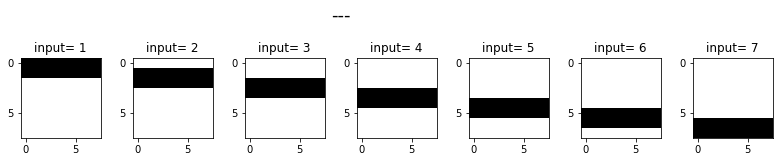

In [10]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("---", fontsize=18, y=0.95)
plt.subplots_adjust(left=0.1,
                    bottom=0.3,
                    right=0.9,
                    top=1.39,
                    wspace=0.4,
                    hspace=0.17)
# set number of columns (use 3 to demonstrate the change)

box_size = 8
half_box_size = box_size//2
box_size = half_box_size* 2  # updated

ncols = box_size
nrows =1
for idx in range (1, box_size):
    ax = plt.subplot(nrows, ncols, idx + 1)
    ax.title.set_text('input= '+str(idx))
    y = line(radius=idx, box_size=box_size, line_ori='x').float()
    plt.imshow(y.reshape(box_size,box_size).detach().numpy(), cmap='Greys',  interpolation='nearest')


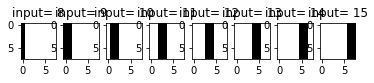

In [11]:
for idx in range (box_size, box_size + box_size):    
    ax = plt.subplot(nrows+1 , ncols, idx+1 )
    ax.title.set_text('input= '+str(idx))
    y = line(radius=idx-box_size, box_size=box_size, line_ori='y').float()
    plt.imshow(y.reshape(box_size,box_size).detach().numpy(), cmap='Greys',  interpolation='nearest')

In [12]:
box_siz = 8
num_samples = 64
half_box_siz = box_siz//2
box_siz = half_box_siz * 2 # updating box size (now it is not an odd number)

In [13]:
def func(num, divider):
    return num//divider + 1
l1 =  np.arange(num_samples//2)
l2 =  np.arange(num_samples//2)

In [14]:
l1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [15]:
(num_samples)/box_siz

8.0

In [16]:
torch.tensor(list(map(func, l1, [(num_samples//2)/box_siz]*(num_samples//2))))


tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5.,
        5., 5., 6., 6., 6., 6., 7., 7., 7., 7., 8., 8., 8., 8.],
       dtype=torch.float64)

In [17]:
# you can use each of the followings for seeing how random number of class samples or fix number of
# class samples might affect the results. one very import factor for training here is to 
# have equal number of samples in each class. Just uncomment the line and comment the other one.

# rand_radious = torch.randint(1, centralbox_size+1, (num_samples,)) # create a random array of raduis 
rand_radious1 = torch.tensor(list(map(func, l1, [(num_samples//2)/box_siz]*(num_samples//2))))
# rand_radious2 = torch.tensor(list(map(func, l2, [(num_samples)/half_box_siz]*(num_samples//2))))
# features1 = circle(radius=rand_radious1, box_size=box_siz)  # data set
features1 = line(radius=rand_radious1, box_size=box_siz, line_ori='x')  # data set

rand_radious2 = torch.tensor(list(map(func, l2, [(num_samples//2)/box_siz]*(num_samples//2))))
# features2 = circle(radius=rand_radious2, box_size=box_siz)  # data set
features2 = line(radius=rand_radious2, box_size=box_siz, line_ori='y')  # data set

In [18]:
features =  torch.cat((features1, features2), axis=0)

In [19]:
features.shape, features1.shape, features2.shape

(torch.Size([64, 8, 8]), torch.Size([32, 8, 8]), torch.Size([32, 8, 8]))

In [20]:
# rand_radious1 = torch.tensor([1]*(num_samples//2))
# rand_radious2 = torch.tensor([2]*(num_samples//2))
# rand_radious = torch.cat((rand_radious1, rand_radious2), axis=0)


# features = box(radius=rand_radious, box_size=box_siz)  # data set

In [21]:
rand_radious1

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5., 5.,
        5., 5., 6., 6., 6., 6., 7., 7., 7., 7., 8., 8., 8., 8.],
       dtype=torch.float64)

In [22]:
half_box_siz


4

In [23]:
# torch.tensor(list(map(func, l1, [(num_samples//2)/half_box_siz]*(num_samples//2))))

In [24]:
features.shape

torch.Size([64, 8, 8])

In [25]:
features[0]

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [26]:
# rand_radious = torch.cat((rand_radious1, rand_radious2), axis=0)

In [27]:
# rand_radious.shape

In [28]:

# l2 =  np.arange(1,box_siz//2)

In [29]:
# rand_radious = torch.tensor(list(map(func, l1, [200//(box_siz//2)]*200)))

In [30]:
# rand_radious

In [31]:
#  np.unique(features, axis=0).shape

In [32]:
# select unique data samples only
# features = torch.from_numpy(np.unique(features, axis=0))#.shape

In [33]:
half_box_siz+1

5

In [34]:
# features.shape

In [35]:
# rand_radious

In [36]:
# rand_radious/rand_radious.max()

In [37]:
# rand_radious[10]/rand_radious.max()

In [38]:
features[10]

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [39]:
features.shape

torch.Size([64, 8, 8])

In [40]:
# Code is 2d and the first col is designated to the first shape family. and the second is for subclass examples.

code = torch.zeros((num_samples, 2))

code[0             : num_samples//2, 0] = 1
code[num_samples//2: num_samples   , 0] = 2

code[0             : num_samples//2, 1] = rand_radious1
code[num_samples//2: num_samples   , 1] = rand_radious2

In [41]:
code

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 3.],
        [1., 3.],
        [1., 3.],
        [1., 3.],
        [1., 4.],
        [1., 4.],
        [1., 4.],
        [1., 4.],
        [1., 5.],
        [1., 5.],
        [1., 5.],
        [1., 5.],
        [1., 6.],
        [1., 6.],
        [1., 6.],
        [1., 6.],
        [1., 7.],
        [1., 7.],
        [1., 7.],
        [1., 7.],
        [1., 8.],
        [1., 8.],
        [1., 8.],
        [1., 8.],
        [2., 1.],
        [2., 1.],
        [2., 1.],
        [2., 1.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 3.],
        [2., 3.],
        [2., 3.],
        [2., 3.],
        [2., 4.],
        [2., 4.],
        [2., 4.],
        [2., 4.],
        [2., 5.],
        [2., 5.],
        [2., 5.],
        [2., 5.],
        [2., 6.],
        [2., 6.],
        [2., 6.],
        [2

In [42]:
code.shape

torch.Size([64, 2])

In [43]:
torch.max(code, axis=0).values

tensor([2., 8.])

In [44]:
code = code/torch.max(code, axis=0).values

In [45]:
code

tensor([[0.5000, 0.1250],
        [0.5000, 0.1250],
        [0.5000, 0.1250],
        [0.5000, 0.1250],
        [0.5000, 0.2500],
        [0.5000, 0.2500],
        [0.5000, 0.2500],
        [0.5000, 0.2500],
        [0.5000, 0.3750],
        [0.5000, 0.3750],
        [0.5000, 0.3750],
        [0.5000, 0.3750],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.6250],
        [0.5000, 0.6250],
        [0.5000, 0.6250],
        [0.5000, 0.6250],
        [0.5000, 0.7500],
        [0.5000, 0.7500],
        [0.5000, 0.7500],
        [0.5000, 0.7500],
        [0.5000, 0.8750],
        [0.5000, 0.8750],
        [0.5000, 0.8750],
        [0.5000, 0.8750],
        [0.5000, 1.0000],
        [0.5000, 1.0000],
        [0.5000, 1.0000],
        [0.5000, 1.0000],
        [1.0000, 0.1250],
        [1.0000, 0.1250],
        [1.0000, 0.1250],
        [1.0000, 0.1250],
        [1.0000, 0.2500],
        [1.0000, 0.2500],
        [1.0

In [46]:
# random code
# code = torch.randint(1, 5, (features.shape[0],1))

In [47]:
# for i in range(features.shape[0]):
# code  = rand_radious/rand_radious.max()
    
#     print(rand_radious[i]/rand_radious.max() )
#     code [i, 0] = features[i].sum()
#     code [i, 1] = features[i].sum()

In [48]:
code.shape

torch.Size([64, 2])

In [49]:
# code[0:]

In [50]:
# features = features/features.shape[1]

In [51]:
features.shape[0]

64

In [52]:
# code  = code/code.max()

In [53]:
def add_pad(mat, pad_x=0, pad_y=0):
    assert(pad_x>=0 and pad_y>=0)
    pad_mat = torch.zeros(mat.shape[0]+2*pad_x, mat.shape[1]+2*pad_y)
    pad_mat[pad_x:mat.shape[0]+pad_x, pad_y:mat.shape[1]+pad_y] = mat
    return pad_mat

In [54]:
a = torch.randint(3, 10, (3, 3))
add_pad(a, 1, 1)

tensor([[0., 0., 0., 0., 0.],
        [0., 7., 9., 5., 0.],
        [0., 3., 6., 9., 0.],
        [0., 7., 9., 4., 0.],
        [0., 0., 0., 0., 0.]])

In [55]:
def conv(src_matices, filter_mat ):
    '''Works on 2d covn
       returns conv matrix of the same shape, with zero-padded 
       filter_mat shape must be (odd,odd)
    '''
    i_filt = filter_mat.shape[0]
    j_filt = filter_mat.shape[1]
    
    # if only one matrix is given, rather than a bunch
    if(src_matices.dim()==2):
        # add another dim in 0th
        src_matices = torch.unsqueeze(src_matices, dim=0)
     
    
    new_mat = torch.zeros(src_matices.shape)
    
    for idx, src_mat in enumerate(src_matices):
        padded_mat = add_pad(src_mat, i_filt//2, j_filt//2) 
        
        # print(new_mat.shape)

        for i in range(i_filt//2,padded_mat.shape[0]-i_filt//2):
            for j in range(i_filt//2,padded_mat.shape[1]-j_filt//2):

                    s= padded_mat[i-i_filt//2: i+i_filt//2+1, j-j_filt//2: j+j_filt//2+1 ]
                    # print()
                    new_mat[idx, i-i_filt//2,j-j_filt//2] =  (s.float()@torch.transpose(filter_mat.float(), 0, 1)).sum()/(filter_mat.shape[0]*filter_mat.shape[1])
                    
    return new_mat/torch.max(new_mat)    

In [56]:
a =  torch.randint(1,2, (3,3))
conv(features[0], a)

tensor([[[0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6667],
         [0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6667],
         [0.3333, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.3333],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])

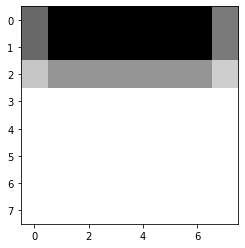

In [57]:
a = torch.randint(1, 3, (3, 3))
conv(features[0], a)
plt.imshow(conv(features[0], a)[0],cmap='Greys', interpolation='none')

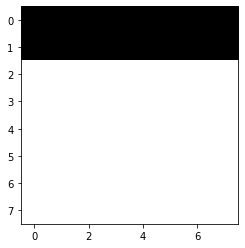

In [58]:
plt.imshow(features[0],cmap='Greys', interpolation='none')


In [59]:
conv(features[25], a)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3333, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.3000],
         [0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6000],
         [0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6000]]])

In [60]:
features[0]

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [61]:
# filter_ = torch.randint(3, 10, (3, 3))
# conv(features[0], filter_)

In [62]:
 # torch.randint(3, 10, (3, 3))

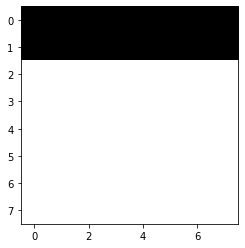

In [63]:
plt.imshow(features[0],cmap='Greys', interpolation='none')
# plt.axis('off');

In [64]:
features[0] .shape

torch.Size([8, 8])

In [65]:
temp_features = features

In [66]:
# apply conv filter on all dataset
# it lets you do average-pooling on data
filter_ = torch.randint(1, 5, (3, 3))
features = conv(features, filter_)
# plt.imshow(conv(features[0], a)[0],cmap='Greys', interpolation='none')

In [67]:
torch.randint(1, 5, (3, 3))

tensor([[3, 3, 3],
        [1, 2, 3],
        [4, 3, 3]])

In [68]:
# temp_features = features

In [69]:
temp_features.shape

torch.Size([64, 8, 8])

In [70]:
features[0]

tensor([[0.5652, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6522],
        [0.5652, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6522],
        [0.2826, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.3261],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [71]:
code.shape[1]

2

In [72]:
features = torch.zeros(temp_features.shape[0]*temp_features.shape[1]* temp_features.shape[2], 2+code.shape[1])
labels = torch.zeros(temp_features.shape[0]*temp_features.shape[1]* temp_features.shape[2])

In [73]:
features.shape

torch.Size([4096, 4])

In [74]:
# how cat function works?
x = torch.tensor([1,2,3])
torch.cat((x, x), axis=0)

tensor([1, 2, 3, 1, 2, 3])

In [75]:
(temp_features.shape[1])

8

In [76]:
#  building data set: first I needed to put all the cooridates (x, y) of pixels in rows of data set and add colums for its codes
count = 0 
for i in range(temp_features.shape[0]):
    for j in range(temp_features.shape[1]):
        for k in range(temp_features.shape[2]):
            features[count] = torch.cat((torch.tensor([j,k])/temp_features.shape[1],  torch.tensor(code[i])), axis=0)
            labels[count] = temp_features[i][j][k]
            count += 1
#             print(temp_features[i])


<ipython-input-76-ed4df0383927>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features[count] = torch.cat((torch.tensor([j,k])/temp_features.shape[1],  torch.tensor(code[i])), axis=0)


In [77]:
features.shape, labels.shape

(torch.Size([4096, 4]), torch.Size([4096]))

In [78]:
features[1065], labels[1065]

(tensor([0.6250, 0.1250, 0.5000, 0.6250]), tensor(1.))

In [79]:
# for feature in features:
#     print(feature)
    


In [80]:
# labels[1450]

In [81]:
# from itertools import permutations
# for i,j, k  in permutations(range(0, 3)):
#     print(i,j,k)

In [82]:
# m = nn.LogSoftmax(dim=1)


In [83]:
input_dim = 2  # x, y poisitons of one pixel
hidden_dim = 40 # this one is so decisive

In [84]:
# defining dropout_layer
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [85]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        is_training = True
#         self.func1 = nn.Linear(input_dim + code.shape[1], hidden_dim)
        self.func1 = nn.Linear(input_dim + 2, hidden_dim)

        self.func2 = nn.Linear(hidden_dim, hidden_dim)
        self.func3 = nn.Linear(hidden_dim, hidden_dim)
        self.func4 = nn.Linear(hidden_dim, hidden_dim)
        self.func5 = nn.Linear(hidden_dim, 1)
        
        self.outp = nn.ReLU()
        
                
                
    def forward(self, x):
#         z = torch.cat((x, code_), axis=0)
        z = nn.functional.relu(self.func1(x.float()))
#         return self.outp(self.func5(z))
            # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.080)
#         return self.outp(self.func5(z))    
        z = nn.functional.relu(self.func2(z.float()))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = nn.functional.relu(self.func3(z))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = nn.functional.relu(self.func4(z))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = self.func5(z)
#         z = self.func5(z)
        
        
        return self.outp(z)

In [86]:
model = Model()

In [87]:
a = torch.tensor([1,2,3, 4])
b = torch.tensor([1,2,3])

In [88]:
code[0]

tensor([0.5000, 0.1250])

In [89]:
# features[1250]

In [90]:
model(features[1])

tensor([0.], grad_fn=<ReluBackward0>)

In [91]:
torch.cat((a, b), axis=0)

tensor([1, 2, 3, 4, 1, 2, 3])

In [92]:
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True): #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [93]:
# for i in range(features[0].shape[0]):
#     for j in range(features[0].shape[1]):
#         print(model(features[0][i][j]))

In [94]:
train_x = features[:-features.shape[0]*20//100]
test_x  = features[-features.shape[0]*20//100:]
train_y = labels[:-labels.shape[0]*20//100]
test_y  = labels[-labels.shape[0]*20//100:]

batch_size = test_x.shape[0]

print(f'train size= {train_x.shape}, test size= {test_x.shape}, batch size= {batch_size}')
print(f'train size= {train_y.shape}, test size= {test_y.shape}, batch size= {batch_size}')
train_loader = load_array((train_x, train_y), batch_size)
test_loader  = load_array((test_x, test_y), batch_size)

train size= torch.Size([3276, 4]), test size= torch.Size([820, 4]), batch size= 820
train size= torch.Size([3276]), test size= torch.Size([820]), batch size= 820


In [95]:
model.parameters()

<generator object Module.parameters at 0x7fb40ff8d200>

In [96]:
# hyperparameters

lr = 2e-2

epochs = 300
DEVICE = 'cpu'
print_step = 50

In [97]:
# features[:-20].shape, features[-20:].shape

In [98]:
# we want to allow only 20% of data for test and the rest on training data
features.shape[0]*20//100

819

In [99]:
# 80% for traning test, and 20% for test


In [100]:
train_x.shape, test_x.shape

(torch.Size([3276, 4]), torch.Size([820, 4]))

# Defining loss function

In [101]:
def clamp(a, b):
#     a = torch.tensor(x)
#     b = torch.tensor(delta)
    return torch.min(b, torch.max(-b, a))

In [102]:
a = torch.tensor([-1, 5, 1.2, 2])
b = torch.tensor([1.2])
clamp(a, b)

tensor([-1.0000,  1.2000,  1.2000,  1.2000])

In [103]:
torch.max(b, a)

tensor([1.2000, 5.0000, 1.2000, 2.0000])

# Training

In [104]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

In [105]:
# torch.randn(3, 5).softmax(dim=1), torch.randn(3, 5)

In [106]:
# loss = nn.CrossEntropyLoss(reduction='none')
# def loss(y_hat, y):
#     return (y_hat-y).sum()
loss = nn.MSELoss()
# loss = nn.CrossEntropyLoss()
# loss = nn.BCEWithLogitsLoss()


In [107]:
# num_epochs = 30
# for epoch in range(num_epochs):
#     for X,Y in train_loader:
#     #     print(X,Y)
# #         x = X.T
# #         y = Y
#         print(X.shape,Y.shape, model(X.float()).shape)
#         l = loss(model(X.float())[:,0], Y.float())
#         optimizer.zero_grad()
#         l.backward()
#         optimizer.step() #optimizer
# #     l = loss(model(x_truth.float()), y_truth.float())
# #     print(f'epoch {epoch + 1}, loss {l:f}')

In [108]:

print("Start training ...")
model.train()

for epoch in range(30):
    overall_loss = 0
    for batch_idx, (x, y) in enumerate(train_loader):
#         x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

#         x_hat, mean, log_var = 
        y_hat = model(x.float()).float()
#         y_hat = y_hat.reshape(-1)
#         y = y.reshape(-1)
#         print(x.shape, y_hat.shape, y.shape)
#         print(y_hat, y)
#         y_hat = y_hat.type(torch.LongTensor)

        l = loss(y_hat.flatten(), y.float().flatten())
#         l = torch.sum(torch.abs(clamp(y_hat.flatten(), torch.tensor([1])) - clamp(y.float().flatten(), torch.tensor([1]))))
#         print(l)
        overall_loss += l.item()
        
        l.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    print(overall_loss)
    
print("Finish!!")


Start training ...
	Epoch 1 complete! 	Average Loss:  0.00034303836585060365
0.843874379992485
	Epoch 2 complete! 	Average Loss:  0.0003037226696809133
0.7471577674150467
	Epoch 3 complete! 	Average Loss:  0.0002982329970937434
0.7336531728506088
	Epoch 4 complete! 	Average Loss:  0.00029412168191700447
0.723539337515831
	Epoch 5 complete! 	Average Loss:  0.0002905308170531823
0.7147058099508286
	Epoch 6 complete! 	Average Loss:  0.0002802258342262206
0.6893555521965027
	Epoch 7 complete! 	Average Loss:  0.0002665653703658561
0.6557508111000061
	Epoch 8 complete! 	Average Loss:  0.00025023732606957596
0.6155838221311569
	Epoch 9 complete! 	Average Loss:  0.00022991099129847394
0.5655810385942459
	Epoch 10 complete! 	Average Loss:  0.00021406207687971068
0.5265927091240883
	Epoch 11 complete! 	Average Loss:  0.00019693007859272686
0.48444799333810806
	Epoch 12 complete! 	Average Loss:  0.00017413460021096515
0.4283711165189743
	Epoch 13 complete! 	Average Loss:  0.0001579720769228974
0.

In [109]:
# list(model.named_parameters())

In [110]:
# a = torch.tensor([0.01, 0.12, 0.72, 0.74])
# model(a)

In [111]:
test_sample = torch.zeros((box_siz, box_siz))

In [112]:
test_sample.shape, temp_features[0].shape, features[0]

(torch.Size([8, 8]),
 torch.Size([8, 8]),
 tensor([0.0000, 0.0000, 0.5000, 0.1250]))

In [113]:
for i in range(box_siz):
    for j in range(box_siz):
#         test_sample [i,j] = torch.tensor([i/10, j/10, 0.25,0.25])
        test_sample [i,j] = model(torch.tensor([i/box_siz, j/box_siz, 0.5002667, 0.0565]))
#         model(torch.tensor([i, j, 0.8, 0.6]))

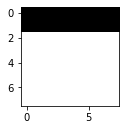

In [114]:
plt.subplot(211)
plt.imshow(temp_features[0].detach().numpy(), cmap='Greys')

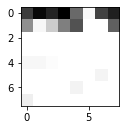

In [115]:
plt.subplot(222)
plt.imshow(test_sample.detach().numpy(), cmap='Greys')

In [116]:
# test_sample

In [117]:
# test_sample.shape, temp_features.shape

In [118]:
# plt.subplot(211)
# plt.imshow(test_sample.detach().numpy(), cmap='Greys')

In [119]:
for i in range(box_siz):
    for j in range(box_siz):
#         test_sample [i,j] = model(torch.tensor([i/10, j/10, 0.25,0.25]))
        test_sample [i,j] = model(torch.tensor([i/box_siz, j/box_siz, 0.51, 0.86]))

In [120]:
test_sample.shape

torch.Size([8, 8])

In [121]:
test_sample.shape

torch.Size([8, 8])

In [122]:
features.shape

torch.Size([4096, 4])

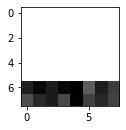

In [123]:
plt.subplot(211)
plt.imshow(test_sample.detach().numpy(), cmap='Greys')


# Generate new samples

In [124]:
# now taking decoder we can produce new data samples

In [125]:
st = rand_radious1.min()/ rand_radious1.max()

In [126]:
num_test = 8
with torch.no_grad():
#     new_code = torch.linspace(0.5, 1, steps=50)
    tia_class = torch.linspace(0.5, 1, steps=num_test).reshape(-1,1)
    tia_sample = torch.linspace(st, 1, steps=num_test).reshape(-1,1)
    new_code = torch.cat((tia_class, tia_sample), axis=1)
#     noise = torch.rand(10, 1).to(DEVICE)
#     model(torch.tensor())
#     generated_sample = model(noise)

In [127]:
# new_code = new_code.reshape(-1, 1)

In [128]:
import itertools
# list(itertools.product(tia, tia))

In [129]:
new_code = torch.tensor(list(itertools.product(tia_class, tia_sample)))

In [130]:
#  torch.cartesian_prod(tia, tia)

In [131]:
new_code.shape

torch.Size([64, 2])

In [132]:
new_code

tensor([[0.5000, 0.1250],
        [0.5000, 0.2500],
        [0.5000, 0.3750],
        [0.5000, 0.5000],
        [0.5000, 0.6250],
        [0.5000, 0.7500],
        [0.5000, 0.8750],
        [0.5000, 1.0000],
        [0.5714, 0.1250],
        [0.5714, 0.2500],
        [0.5714, 0.3750],
        [0.5714, 0.5000],
        [0.5714, 0.6250],
        [0.5714, 0.7500],
        [0.5714, 0.8750],
        [0.5714, 1.0000],
        [0.6429, 0.1250],
        [0.6429, 0.2500],
        [0.6429, 0.3750],
        [0.6429, 0.5000],
        [0.6429, 0.6250],
        [0.6429, 0.7500],
        [0.6429, 0.8750],
        [0.6429, 1.0000],
        [0.7143, 0.1250],
        [0.7143, 0.2500],
        [0.7143, 0.3750],
        [0.7143, 0.5000],
        [0.7143, 0.6250],
        [0.7143, 0.7500],
        [0.7143, 0.8750],
        [0.7143, 1.0000],
        [0.7857, 0.1250],
        [0.7857, 0.2500],
        [0.7857, 0.3750],
        [0.7857, 0.5000],
        [0.7857, 0.6250],
        [0.7857, 0.7500],
        [0.7

In [133]:
box_siz//2 * 2

8

In [134]:
count = 0
generated_sample = torch.empty((new_code.shape[0], box_siz ** 2))
print(generated_sample.shape)
for c in new_code:
    for i in range(box_siz):
        for j in range(box_siz):
            test_sample [i,j] = model(torch.cat((torch.tensor([i/box_siz, j/box_siz]), c)))
    
#     print(test_sample.shape, test_sample.flatten().shape)
    generated_sample[count] = test_sample.flatten()
    count += 1
#     generated_sample = torch.cat((generated_sample, test_sample.flatten()), axis=0)

torch.Size([64, 64])


In [135]:
# noise.shape

In [136]:
generated_sample.shape

torch.Size([64, 64])

In [137]:
203/29

7.0

In [138]:
# generated_sample[0]

In [139]:
box_siz//2 *2

8

In [140]:
# plt.subplot(212)
# y = generated_sample[2].reshape(box_siz//2 *2,box_siz//2 *2).float()
# plt.imshow(y.detach().numpy(), cmap='Greys',  interpolation='nearest')

In [141]:
torch.tensor([1,2])

tensor([1, 2])

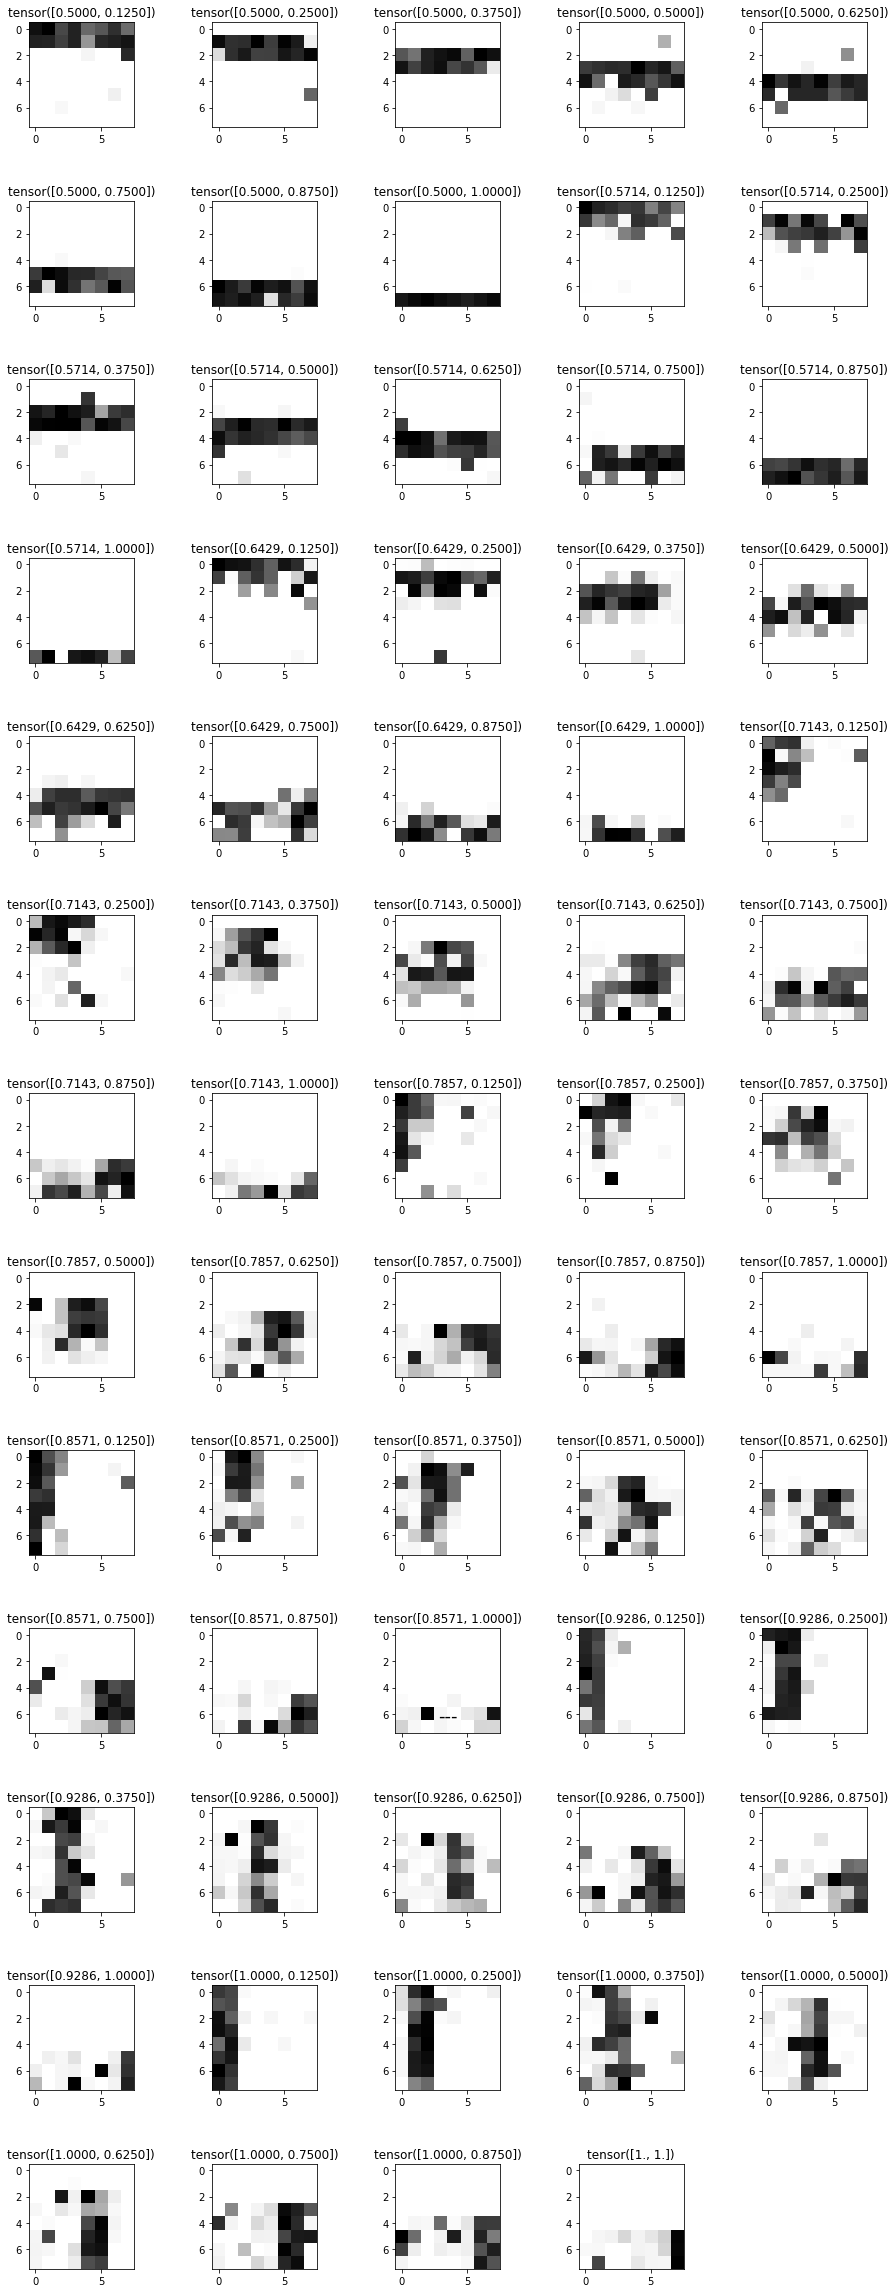

In [142]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("---", fontsize=18, y=0.95)
plt.subplots_adjust(left=0.1,
                    bottom=0.3,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.7)
# set number of columns (use 3 to demonstrate the change)
ncols =5

nrows = new_code.shape[0]//ncols +1
if (nrows==0):
    nrows =1
    
for idx, sample in enumerate (generated_sample):
#     print(sample.shape)
    ax = plt.subplot(nrows, ncols, idx + 1)
    ax.title.set_text(str(new_code[idx]))
#     print([idx])
    y = sample.reshape(box_siz, box_siz).float()

    plt.imshow(y.detach().numpy(), cmap='Greys',  interpolation='nearest')
    


# comment

In [143]:
# dataset should be evenly splited with samples from each class. Random setting is not good, as you might
# not providing equal (sufficient) samples of one specefic class and over provide for another class.
# This produces bias for the training. To see this go up and uncomment the line.

# if you like to produce black square or circles you only need to edit box function on the top of 
# this notebook file.

# Adding more sample data was the best practice for accuracy. 
# For seeing the results it was best to choose a larger box size.

# adding dropout was a good practice.

# there are more than one loss functions I tested here. loss = nn.MSELoss() is the best
# loss = nn.BCEWithLogitsLoss() was not good. Don't know why.

# sometimes you need to run this notebook file more than once to have a good result

# sometimes you should play with hidden layers numbers and ... to fine tune the results.

# when I incresed box size, it produces more zerots in the plane and ones. sometimes it is not good
# as it only thinks that majority of pixels are zero and trains zero planes.
